In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#тепловая карта + вывод A, R2 и числа обусловленности
def corr(df, size1=32, size2=32):
    model = sm.OLS(df["Price"], df.drop(columns=["Price"]))
    result = model.fit()
    print("R2:", result.rsquared)
    A = abs(result.resid)/df["Price"] * 100
    print("A:", A.mean())
    print("Cond.Num:", result.condition_number)
    plot_corr(df, size1, size2)

In [3]:
#построение тепловой карты корреляции
def plot_corr(df, size1=32, size2=32):
    try:
        plot_df = df.drop(columns=["const"])
    except:
        plot_df = df.copy()
        
    f = plt.figure(figsize=(size1, size2))
    plt.matshow(plot_df.corr().round(2), fignum=f.number, vmin=-1, vmax=1)
    for i in range(plot_df.shape[1]):
        for j in range(plot_df.shape[1]):
            plt.text(j, i, round(plot_df.corr().iloc[i, j], 2), ha="center", va="center", fontsize=14)
    plt.xticks(range(plot_df.select_dtypes(['number']).shape[1]), plot_df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
    plt.yticks(range(plot_df.select_dtypes(['number']).shape[1]), plot_df.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16)

In [4]:
df = pd.read_csv("data.csv", sep=";")

In [5]:
df.shape

(700, 70)

In [6]:
df.head()

id   Price  Seats  Doors  Mileage  Explotation_period  Engine_volume  \
0   0  713900      5      4        0                   0           1596   
1   1  553000      5      4    77000                   3           1596   
2   2  498000      5      4    89000                   3           1596   
3   3  842900      5      4        0                   0           1598   
4   4  494750      5      4    51000                   5           1596   

   Width  Diameter_cylinder_and_stroke_piston  Maximum_power  ...  \
0   1764                                 82.0            106  ...   
1   1764                                 82.0            106  ...   
2   1764                                 82.0            106  ...   
3   1764                                 78.0            113  ...   
4   1764                                 82.0            106  ...   

   Model_Granta   Model_Kalina   Model_Largus   Model_Priora   Model_Vesta   \
0              0              0              0              0             1   
1              0              0              0              0             1   
2              0              0              0              0             1   
3              0              0              0              0             1   
4              0              0              0              0             1   

   Model_XRAY   Drive_full  Drive_rear  Fuel_AI-95  Fuel_GAZ  
0            0           0           0           0         0  
1            0           0           0           0         0  
2            0           0           0           0         0  
3            0           0           0           0         0  
4            0           0           0           0         0  

[5 rows x 70 columns]

In [7]:
df.columns

Index(['id', 'Price', 'Seats', 'Doors', 'Mileage', 'Explotation_period',
       'Engine_volume', 'Width', 'Diameter_cylinder_and_stroke_piston',
       'Maximum_power', 'Length', 'Wheelbase', 'Height', 'Torque',
       'Valves_per_cylinder', 'Volume_fuel_tank', 'Rear_track_width',
       'Front_track_width', 'Curb_weight_kg', 'Clearance', 'Maximum_speed',
       'Transmissions', 'Speed_to_100', 'Full_weight', 'Compression_ratio',
       'Consumption', 'Restyling', 'Years_from_release_start_series',
       'Trunk_volume_max', 'Expense_city', 'Box_mechanics', 'Box_robot',
       'Box_variator', 'Color_black', 'Color_blue', 'Color_brown',
       'Color_gold', 'Color_gray', 'Color_green', 'Color_light Blue',
       'Color_magenta', 'Color_orange', 'Color_purple', 'Color_red',
       'Color_silver', 'Color_white', 'Color_yellow', 'Car_type_Liftback',
       'Car_type_SUV', 'Car_type_Sedan', 'Car_type_Station Wagon',
       'Car_type_Van', 'Model_2103 ', 'Model_2104 ', 'Model_2105 ',
       

In [8]:
df = df.drop(columns=["id"])

In [9]:
df.insert(4,"Mileage^2", df.Mileage**2)
df.insert(6,"Explotation_period^2", df.Explotation_period**2)

In [10]:
df = df.reset_index(drop=True)
rand_nums = [321, 171, 125, 167, 493, 271, 148, 444, 628, 160, 351, 273, 83, 424, 131, 456, 332, 374, 625, 109]
df_for_predict = df.iloc[rand_nums, :]
df = df.drop(rand_nums, axis=0)

In [11]:
df_for_predict

Price  Seats  Doors  Mileage    Mileage^2  Explotation_period  \
321  135000      5      4   147000  21609000000                  11   
171  660000      5      5    53000   2809000000                   2   
125  477500      5      5        0            0                   0   
167  669900      5      5        0            0                   0   
493  115000      5      4    48545   2356617025                  15   
271  399000      5      4    36980   1367520400                   2   
148  119000      5      5   188000  35344000000                  13   
444  265000      5      4   110000  12100000000                   8   
628  130000      5      4   100000  10000000000                  40   
160   58000      5      5   134000  17956000000                  14   
351  574900      5      5    92000   8464000000                   5   
273  300000      5      4    47800   2284840000                   3   
83   831900      5      5        0            0                   0   
424  255000      5      5    17000    289000000                  10   
131  599500      5      5        0            0                   0   
456  315000      5      4    28142    791972164                  21   
332  389000      5      3    75000   5625000000                   4   
374  449000      5      5    91491   8370603081                   6   
625  200000      5      4    50000   2500000000                  44   
109  569000      5      5    55053   3030832809                   2   

     Explotation_period^2  Engine_volume  Width  \
321                   121           1596   1650   
171                     4           1596   1750   
125                     0           1596   1700   
167                     0           1596   1750   
493                   225           1451   1620   
271                     4           1596   1700   
148                   169           1596   1680   
444                    64           1596   1680   
628                  1600           1450   1611   
160                   196           1596   1680   
351                    25           1598   1756   
273                     9           1596   1700   
83                      0           1596   1764   
424                   100           1390   1700   
131                     0           1596   1700   
456                   441           1499   1620   
332                    16           1690   1690   
374                    36           1596   1700   
625                  1936           1198   1611   
109                     4           1596   1764   

     Diameter_cylinder_and_stroke_piston  ...  Model_Granta   Model_Kalina   \
321                                 82.0  ...              0              0   
171                                 82.0  ...              0              0   
125                                 82.0  ...              1              0   
167                                 82.0  ...              0              0   
493                                 76.0  ...              0              0   
271                                 82.0  ...              1              0   
148                                  0.0  ...              0              0   
444                                 82.0  ...              0              0   
628                                 76.0  ...              0              0   
160                                  0.0  ...              0              0   
351                                 79.5  ...              0              0   
273                                 82.0  ...              1              0   
83                                  82.0  ...              0              0   
424                                 81.0  ...              0              1   
131                                 82.0  ...              1              0   
456                                 82.0  ...              0              0   
332                                 82.0  ...              0              0   
374                 

In [12]:
Y = np.array(df.loc[:, "Price"])
X = df.drop(columns=["Price"])

In [13]:
X.head()

Seats  Doors  Mileage   Mileage^2  Explotation_period  \
0      5      4        0           0                   0   
1      5      4    77000  5929000000                   3   
2      5      4    89000  7921000000                   3   
3      5      4        0           0                   0   
4      5      4    51000  2601000000                   5   

   Explotation_period^2  Engine_volume  Width  \
0                     0           1596   1764   
1                     9           1596   1764   
2                     9           1596   1764   
3                     0           1598   1764   
4                    25           1596   1764   

   Diameter_cylinder_and_stroke_piston  Maximum_power  ...  Model_Granta   \
0                                 82.0            106  ...              0   
1                                 82.0            106  ...              0   
2                                 82.0            106  ...              0   
3                                 78.0            113  ...              0   
4                                 82.0            106  ...              0   

   Model_Kalina   Model_Largus   Model_Priora   Model_Vesta   Model_XRAY   \
0              0              0              0             1            0   
1              0              0              0             1            0   
2              0              0              0             1            0   
3              0              0              0             1            0   
4              0              0              0             1            0   

   Drive_full  Drive_rear  Fuel_AI-95  Fuel_GAZ  
0           0           0           0         0  
1           0           0           0         0  
2           0           0           0         0  
3           0           0           0         0  
4           0           0           0         0  

[5 rows x 70 columns]

In [14]:
modelOLS = sm.OLS(Y, sm.add_constant(X))
result = modelOLS.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     73.66
Date:                Fri, 12 May 2023   Prob (F-statistic):          5.78e-250
Time:                        21:17:35   Log-Likelihood:                -8735.6
No. Observations:                 680   AIC:                         1.761e+04
Df Residuals:                     612   BIC:                         1.791e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [15]:
print(X.columns)

Index(['Seats', 'Doors', 'Mileage', 'Mileage^2', 'Explotation_period',
       'Explotation_period^2', 'Engine_volume', 'Width',
       'Diameter_cylinder_and_stroke_piston', 'Maximum_power', 'Length',
       'Wheelbase', 'Height', 'Torque', 'Valves_per_cylinder',
       'Volume_fuel_tank', 'Rear_track_width', 'Front_track_width',
       'Curb_weight_kg', 'Clearance', 'Maximum_speed', 'Transmissions',
       'Speed_to_100', 'Full_weight', 'Compression_ratio', 'Consumption',
       'Restyling', 'Years_from_release_start_series', 'Trunk_volume_max',
       'Expense_city', 'Box_mechanics', 'Box_robot', 'Box_variator',
       'Color_black', 'Color_blue', 'Color_brown', 'Color_gold', 'Color_gray',
       'Color_green', 'Color_light Blue', 'Color_magenta', 'Color_orange',
       'Color_purple', 'Color_red', 'Color_silver', 'Color_white',
       'Color_yellow', 'Car_type_Liftback', 'Car_type_SUV', 'Car_type_Sedan',
       'Car_type_Station Wagon', 'Car_type_Van', 'Model_2103 ', 'Model_2104 ',


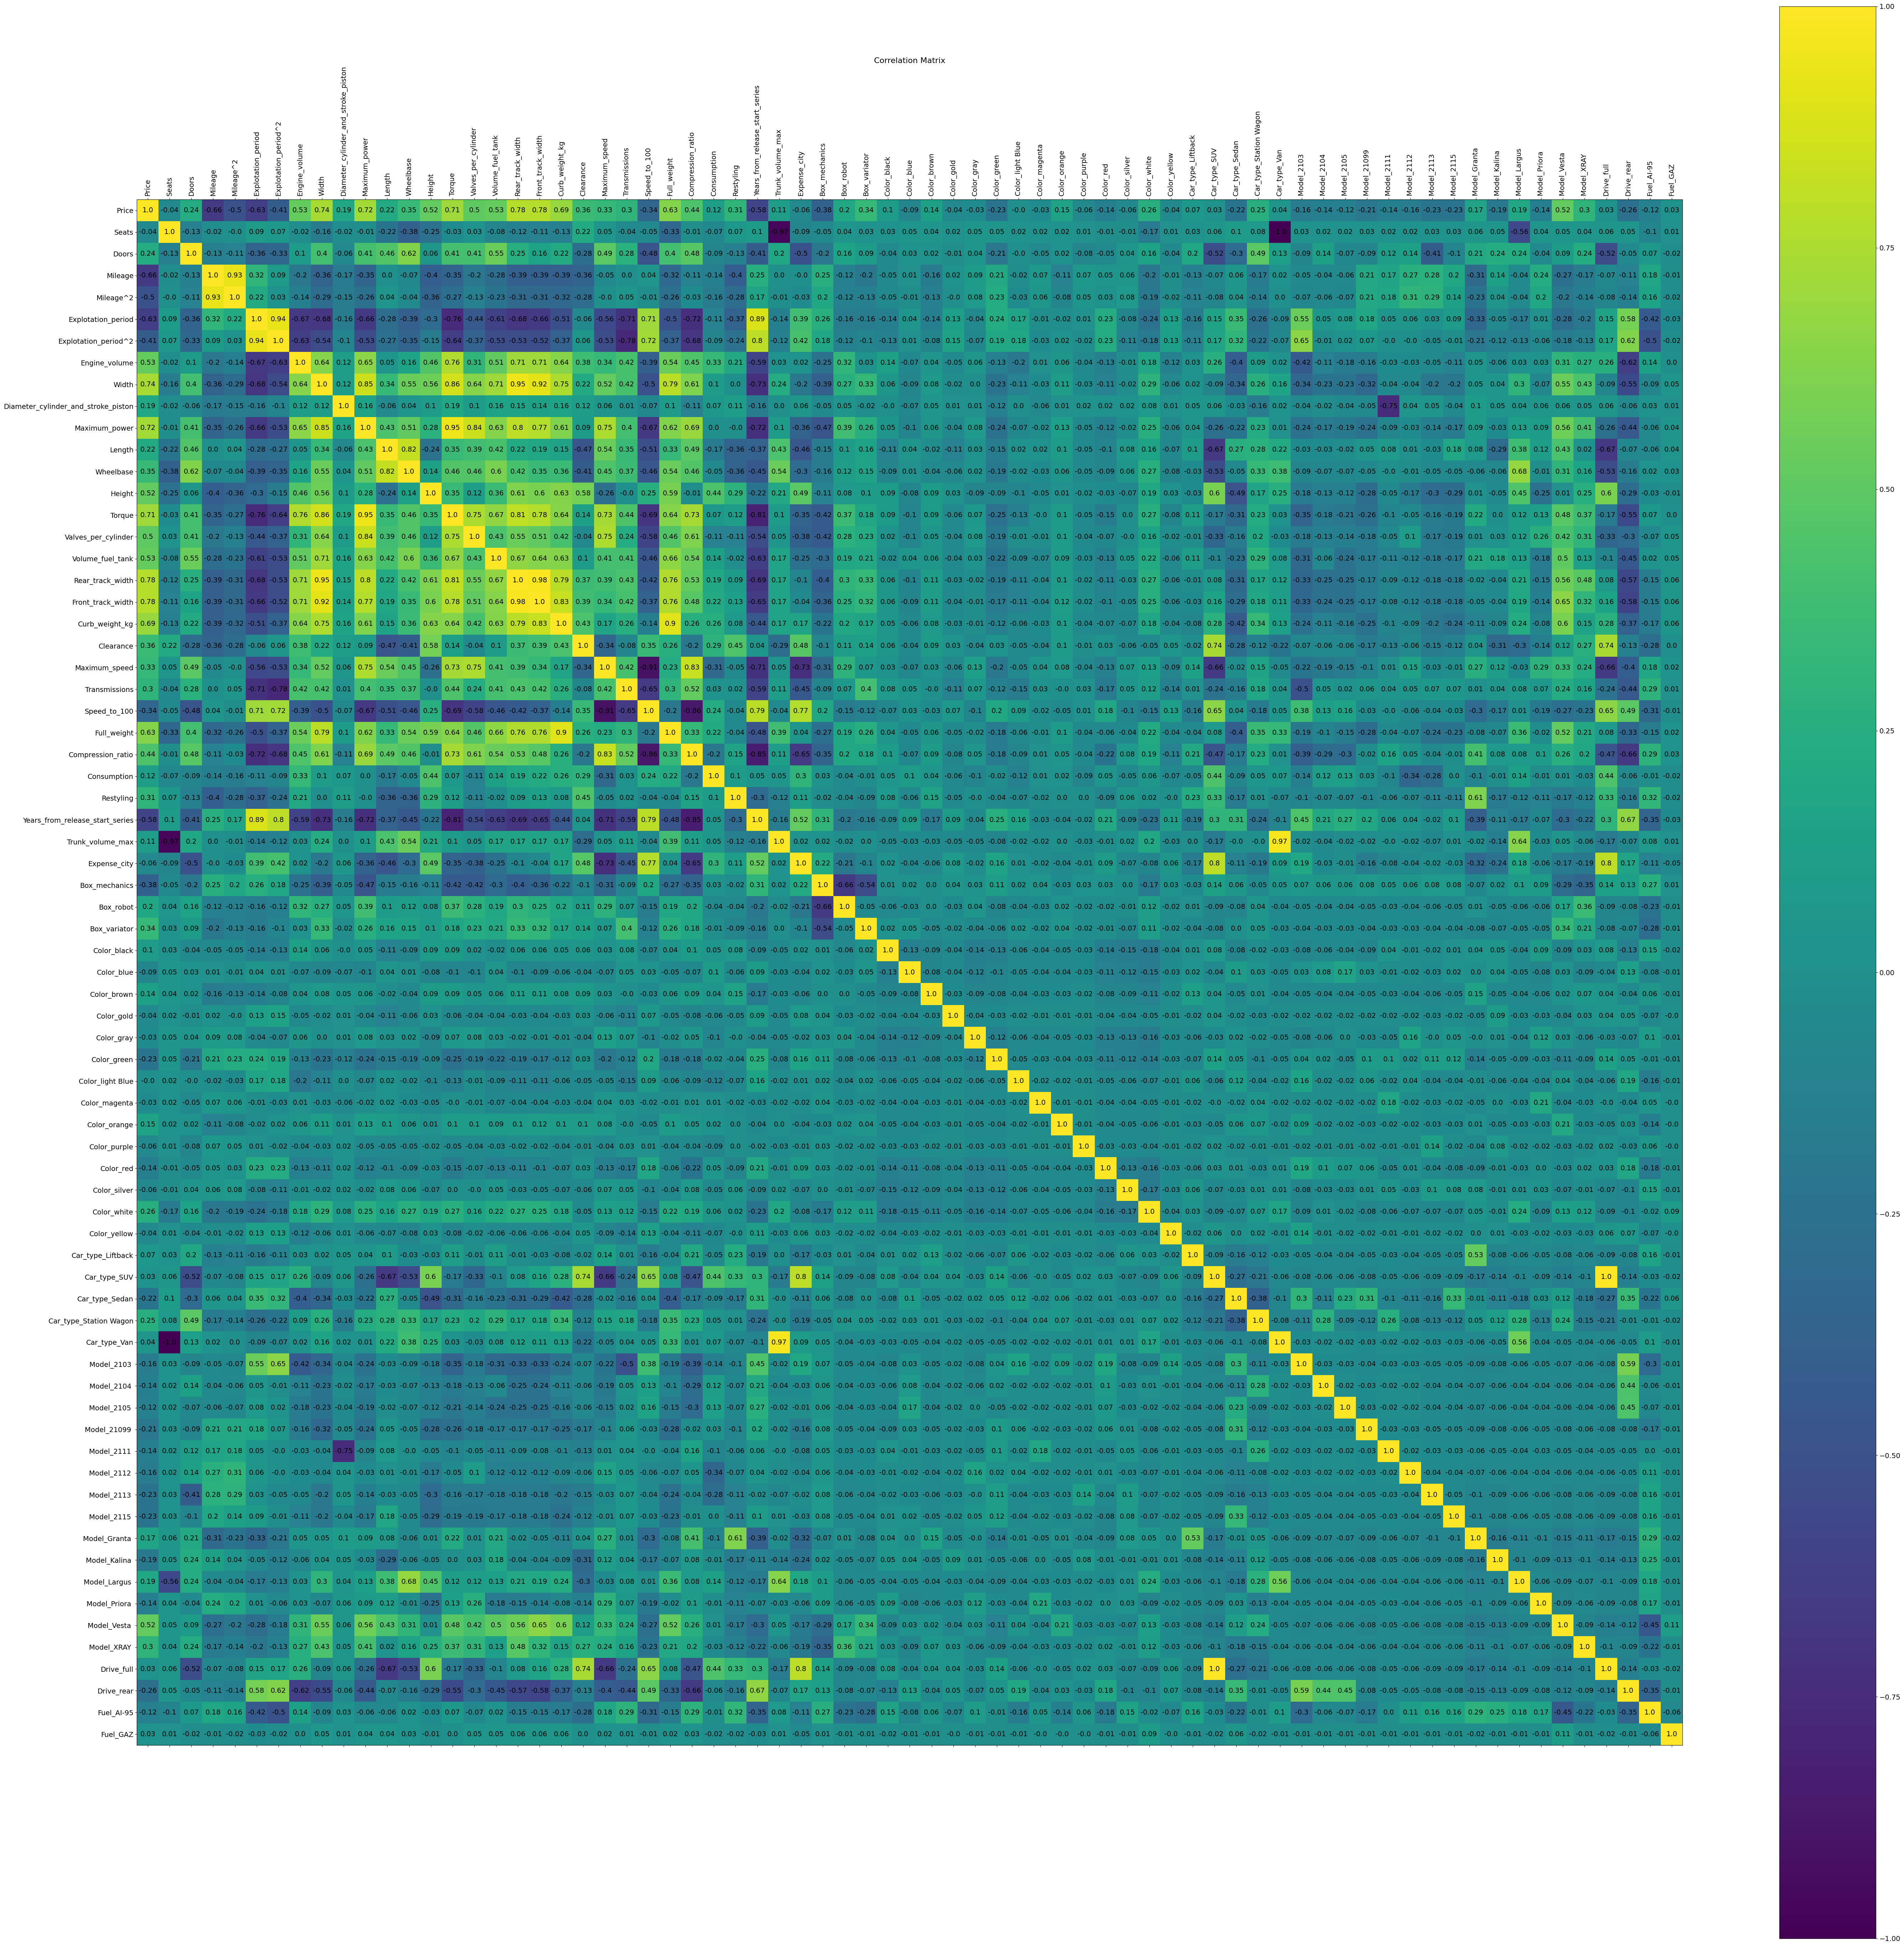

In [16]:
plot_corr(df, 70, 70)

In [17]:
#последоваетльное удаление остатков, больших по модулю 98 перцентиля модулей остатков
drop_emissions_df = X.copy()
drop_emissions_df.insert(0, "Price", Y)

drop_emissions_model = sm.OLS(drop_emissions_df["Price"],
                                  sm.add_constant(drop_emissions_df.drop(columns=["Price"]))).fit()
resid_threshold = drop_emissions_model.resid.abs().quantile(0.98)
print(f"98 перцентиль: {resid_threshold}")
while max(drop_emissions_model.resid.abs()) > resid_threshold:
    drop_emissions_model = sm.OLS(drop_emissions_df["Price"],
                                  sm.add_constant(drop_emissions_df.drop(columns=["Price"]))).fit()
    
    drop_emissions_df = drop_emissions_df.drop(drop_emissions_model.resid.abs().idxmax())

98 перцентиль: 213097.7070155627


In [18]:
modelOLS = sm.OLS(drop_emissions_df["Price"], sm.add_constant(drop_emissions_df.drop(columns=["Price"])))
result = modelOLS.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     209.7
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        21:18:04   Log-Likelihood:                -8136.3
No. Observations:                 661   AIC:                         1.641e+04
Df Residuals:                     593   BIC:                         1.671e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [19]:
#тест Бреуша-Пагана - гетероскедастичность отсутствует
sm.stats.diagnostic.het_breuschpagan(result.resid, sm.add_constant(drop_emissions_df.drop(columns=["Price"])))

(226.10207202501385,
 2.493557008670512e-18,
 4.601475292441595,
 9.64345089093837e-25)

In [20]:
X_for_vif = drop_emissions_df.drop(columns=["Price"])

In [21]:
X_for_vif.columns

Index(['Seats', 'Doors', 'Mileage', 'Mileage^2', 'Explotation_period',
       'Explotation_period^2', 'Engine_volume', 'Width',
       'Diameter_cylinder_and_stroke_piston', 'Maximum_power', 'Length',
       'Wheelbase', 'Height', 'Torque', 'Valves_per_cylinder',
       'Volume_fuel_tank', 'Rear_track_width', 'Front_track_width',
       'Curb_weight_kg', 'Clearance', 'Maximum_speed', 'Transmissions',
       'Speed_to_100', 'Full_weight', 'Compression_ratio', 'Consumption',
       'Restyling', 'Years_from_release_start_series', 'Trunk_volume_max',
       'Expense_city', 'Box_mechanics', 'Box_robot', 'Box_variator',
       'Color_black', 'Color_blue', 'Color_brown', 'Color_gold', 'Color_gray',
       'Color_green', 'Color_light Blue', 'Color_magenta', 'Color_orange',
       'Color_purple', 'Color_red', 'Color_silver', 'Color_white',
       'Color_yellow', 'Car_type_Liftback', 'Car_type_SUV', 'Car_type_Sedan',
       'Car_type_Station Wagon', 'Car_type_Van', 'Model_2103 ', 'Model_2104 ',


In [22]:
#удаление факторов, линейно зависящих друг от друга и квадратов переменных
X_for_vif = X_for_vif.drop(columns=["Car_type_SUV", "Car_type_Van", "Mileage^2", "Explotation_period^2"])

In [23]:
plot_corr(X_for_vif, 65, 65)

Error in callback <function flush_figures at 0x000002A9D25AAD30> (for post_execute):


KeyboardInterrupt: 

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
X_for_vif.columns

Index(['Seats', 'Doors', 'Mileage', 'Explotation_period', 'Engine_volume',
       'Width', 'Diameter_cylinder_and_stroke_piston', 'Maximum_power',
       'Length', 'Wheelbase', 'Height', 'Torque', 'Valves_per_cylinder',
       'Volume_fuel_tank', 'Rear_track_width', 'Front_track_width',
       'Curb_weight_kg', 'Clearance', 'Maximum_speed', 'Transmissions',
       'Speed_to_100', 'Full_weight', 'Compression_ratio', 'Consumption',
       'Restyling', 'Years_from_release_start_series', 'Trunk_volume_max',
       'Expense_city', 'Box_mechanics', 'Box_robot', 'Box_variator',
       'Color_black', 'Color_blue', 'Color_brown', 'Color_gold', 'Color_gray',
       'Color_green', 'Color_light Blue', 'Color_magenta', 'Color_orange',
       'Color_purple', 'Color_red', 'Color_silver', 'Color_white',
       'Color_yellow', 'Car_type_Liftback', 'Car_type_Sedan',
       'Car_type_Station Wagon', 'Model_2103 ', 'Model_2104 ', 'Model_2105 ',
       'Model_21099 ', 'Model_2111 ', 'Model_2112 ', 'Model_2

In [26]:
#удаление факторов с помощью коэффициента инфляции дисперсии
def remove_multicollinearity_vif(X, threshold):
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.iloc[1:]
    
    while max(vif["VIF"]) > threshold:
        max_vif_idx = vif["VIF"].idxmax()
        X = X.drop(columns=[vif.loc[max_vif_idx, "features"]])

        vif = pd.DataFrame()
        vif["features"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return X

In [27]:
new_X = remove_multicollinearity_vif(X_for_vif, 10)

In [28]:
Y = drop_emissions_df["Price"]

In [29]:
new_X.columns

Index(['Mileage', 'Explotation_period', 'Restyling', 'Trunk_volume_max',
       'Box_robot', 'Box_variator', 'Color_black', 'Color_blue', 'Color_brown',
       'Color_gold', 'Color_gray', 'Color_green', 'Color_light Blue',
       'Color_magenta', 'Color_orange', 'Color_purple', 'Color_red',
       'Color_silver', 'Color_white', 'Color_yellow', 'Car_type_Liftback',
       'Car_type_Sedan', 'Car_type_Station Wagon', 'Model_2103 ',
       'Model_2104 ', 'Model_2105 ', 'Model_21099 ', 'Model_2111 ',
       'Model_2112 ', 'Model_2113 ', 'Model_2115 ', 'Model_Kalina ',
       'Model_Largus ', 'Model_Priora ', 'Model_Vesta ', 'Model_XRAY ',
       'Drive_full', 'Fuel_GAZ'],
      dtype='object')

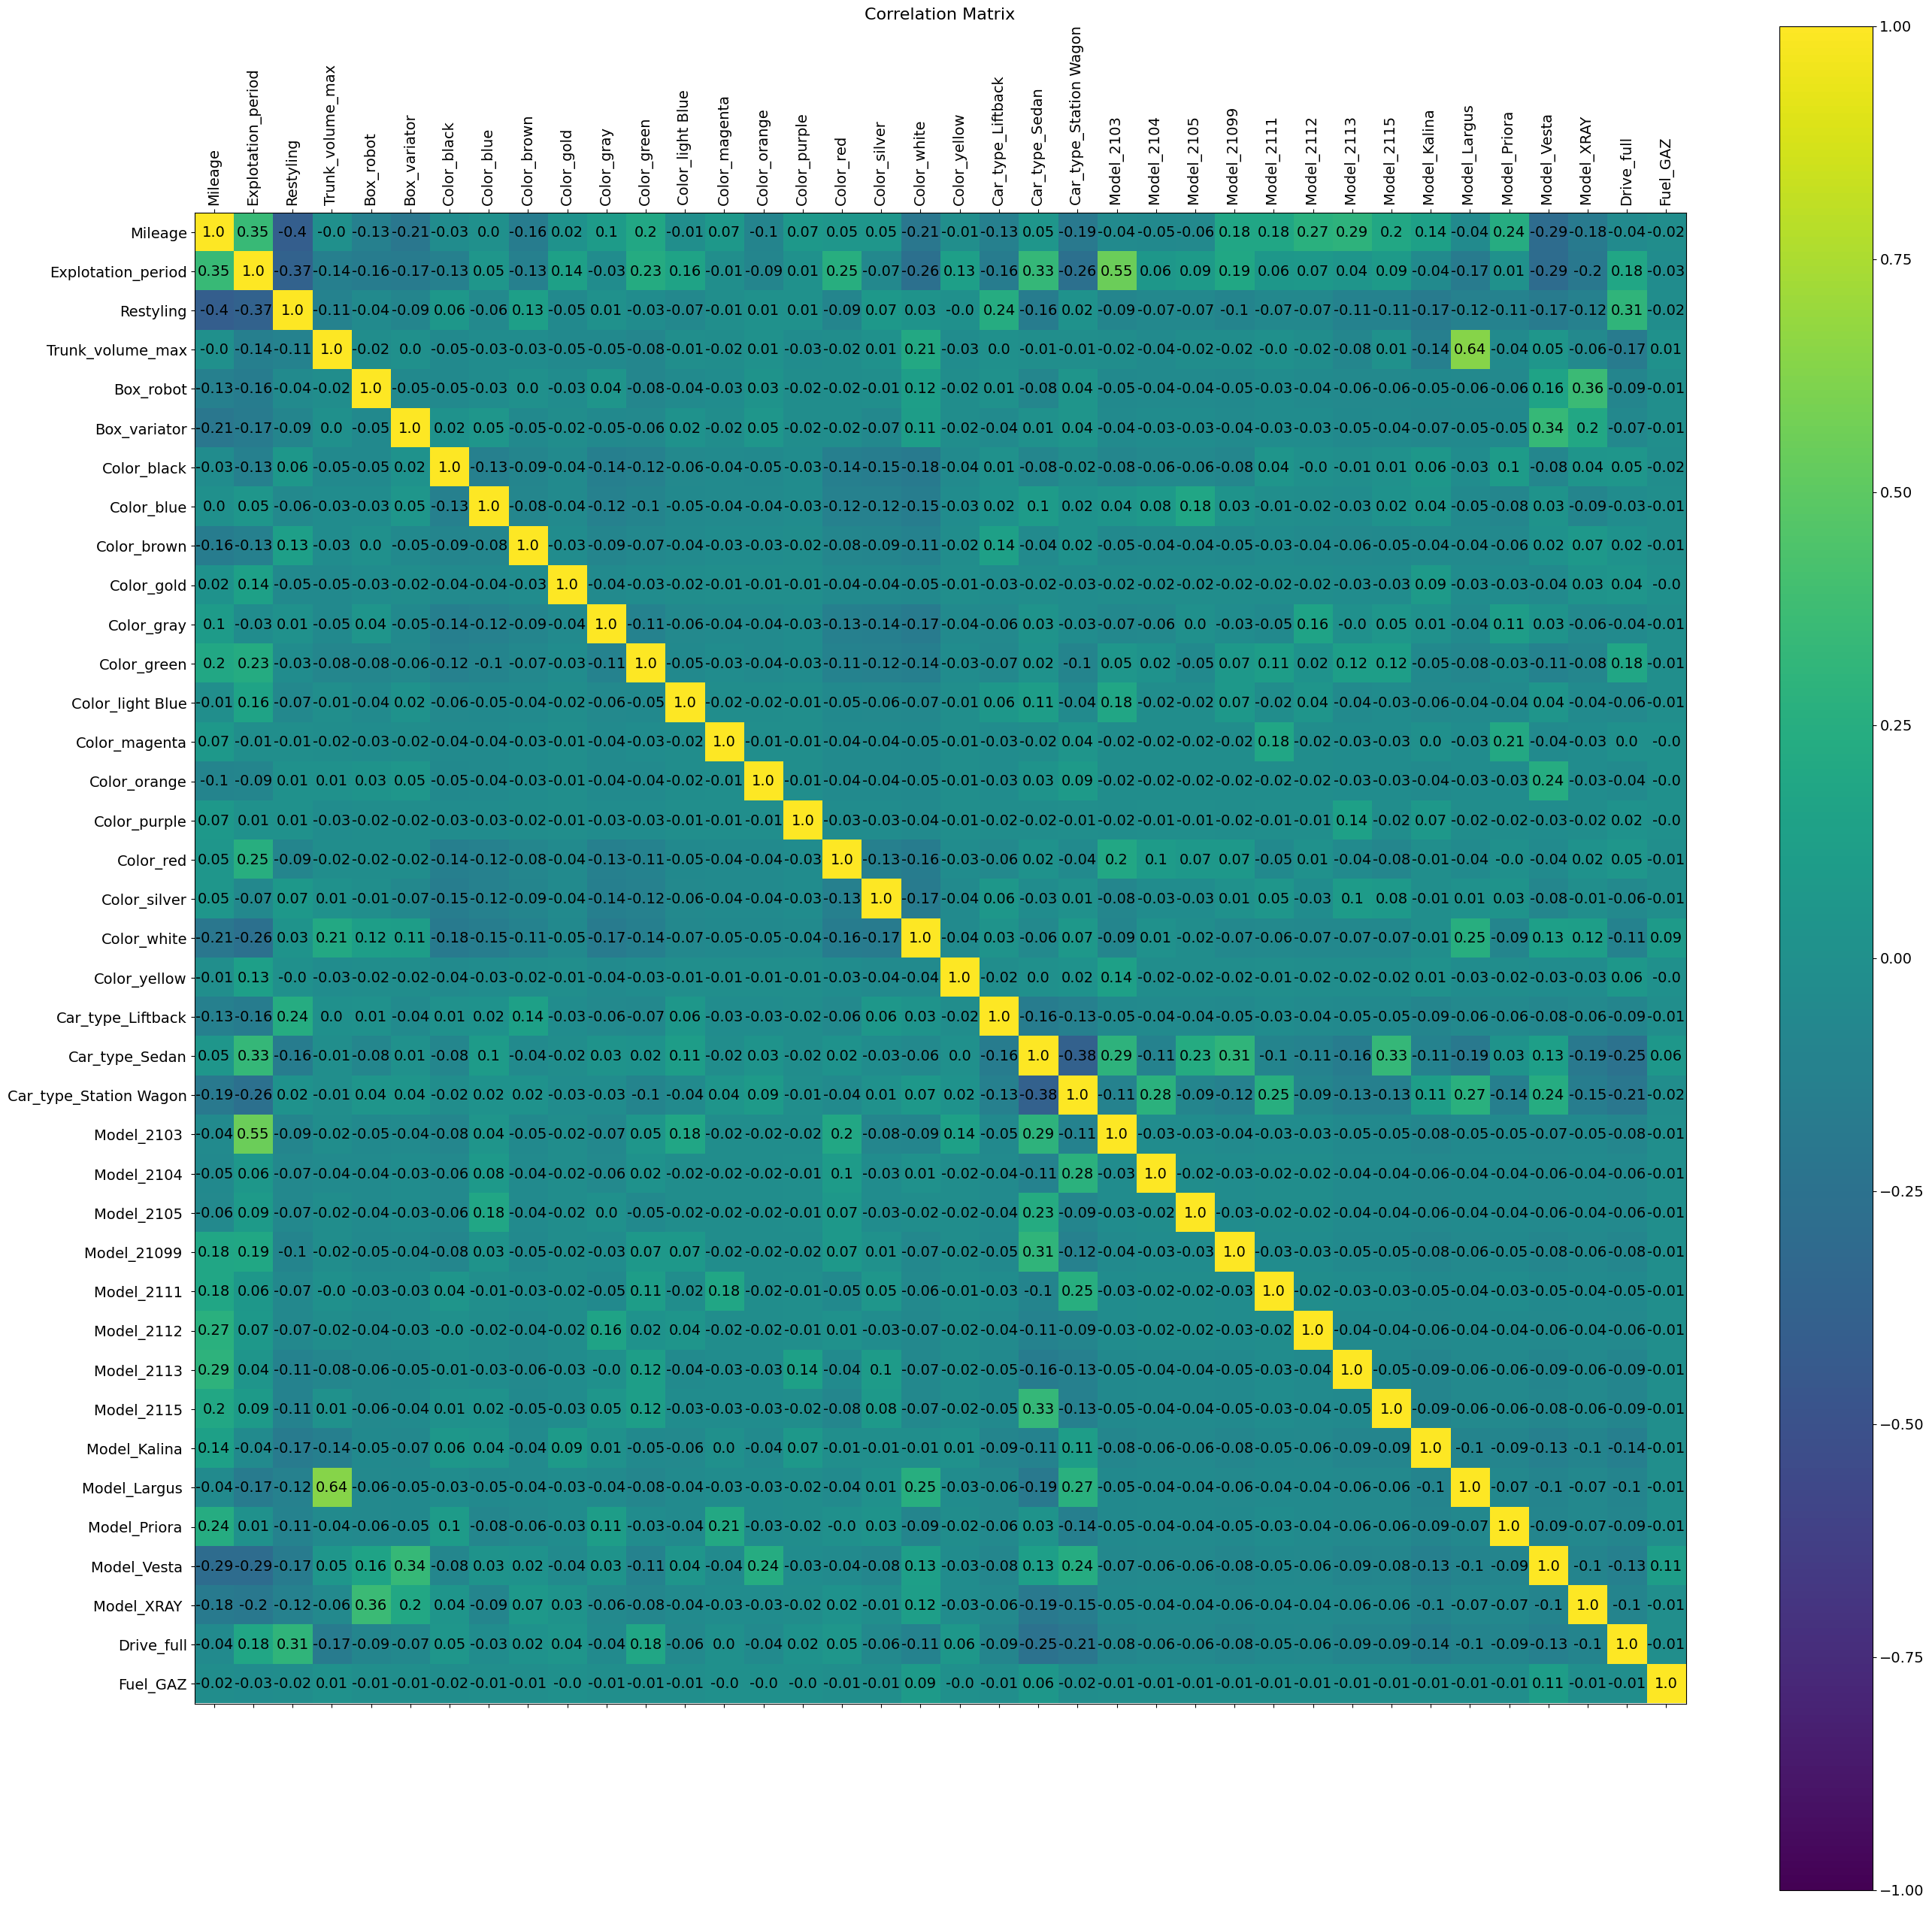

In [30]:
plot_corr(new_X)

In [31]:
modelOLS = sm.OLS(Y, sm.add_constant(new_X)) #0.836
result = modelOLS.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     207.5
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        21:18:41   Log-Likelihood:                -8331.5
No. Observations:                 661   AIC:                         1.674e+04
Df Residuals:                     622   BIC:                         1.692e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.43

In [32]:
new_X.columns

Index(['Mileage', 'Explotation_period', 'Restyling', 'Trunk_volume_max',
       'Box_robot', 'Box_variator', 'Color_black', 'Color_blue', 'Color_brown',
       'Color_gold', 'Color_gray', 'Color_green', 'Color_light Blue',
       'Color_magenta', 'Color_orange', 'Color_purple', 'Color_red',
       'Color_silver', 'Color_white', 'Color_yellow', 'Car_type_Liftback',
       'Car_type_Sedan', 'Car_type_Station Wagon', 'Model_2103 ',
       'Model_2104 ', 'Model_2105 ', 'Model_21099 ', 'Model_2111 ',
       'Model_2112 ', 'Model_2113 ', 'Model_2115 ', 'Model_Kalina ',
       'Model_Largus ', 'Model_Priora ', 'Model_Vesta ', 'Model_XRAY ',
       'Drive_full', 'Fuel_GAZ'],
      dtype='object')

In [33]:
new_X.insert(0, "Mileage^2", new_X["Mileage"]**2)
new_X.insert(2, "Explotation_period^2", new_X["Explotation_period"]**2)

In [34]:
modelSquare = sm.OLS(Y, sm.add_constant(new_X))
result = modelSquare.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     249.1
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        21:18:41   Log-Likelihood:                -8258.3
No. Observations:                 661   AIC:                         1.660e+04
Df Residuals:                     620   BIC:                         1.678e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.12

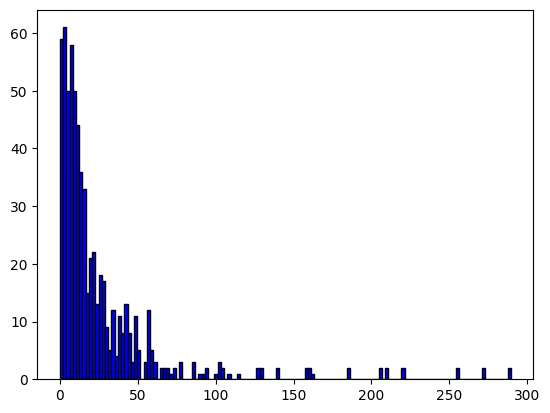

In [35]:
#распределение ошибки аппроксимации
plt.hist(abs(result.resid)/Y * 100, color = 'blue', edgecolor = 'black',
         bins = int(700/5))
plt.show()

In [36]:
pd.options.display.float_format ='{:,.3f}'.format
pd.Series(abs(result.resid)/Y * 100).describe()

count   661.000
mean     26.260
std      40.329
min       0.000
25%       6.087
50%      12.771
75%      28.562
max     289.455
dtype: float64

In [37]:
#последоваельное удаление выбросов по ошибке аппроксимации
df_without_emissions = new_X.copy()
df_without_emissions.insert(0, "Price", Y)

drop_emissions_model = sm.OLS(drop_emissions_df["Price"],
                                  sm.add_constant(drop_emissions_df.drop(columns=["Price"]))).fit()
df_without_emissions["A"] = drop_emissions_model.resid.abs()/df_without_emissions["Price"] * 100

while max(df_without_emissions["A"]) > 200:
    drop_emissions_model = sm.OLS(drop_emissions_df["Price"],
                                  sm.add_constant(drop_emissions_df.drop(columns=["Price"]))).fit()
    
    df_without_emissions = df_without_emissions.drop(df_without_emissions["A"].idxmax())

In [38]:
#описание ошибки аппроксимации
(drop_emissions_model.resid.abs()/ df_without_emissions["Price"] * 100).describe()

count   649.000
mean     19.782
std      27.383
min       0.000
25%       4.681
50%      10.055
75%      23.037
max     180.232
dtype: float64

In [39]:
#последоваельное удаление незначимых факторов
significantX = df_without_emissions.drop(columns=["Price", "A"])
new_Y = df_without_emissions["Price"]
while True:
    modelOLS = sm.OLS(new_Y, sm.add_constant(significantX))
    result = modelOLS.fit()
    pval = result.pvalues.drop(labels=["const"])
    max_pval = pval.idxmax()

    if pval[max_pval] > 0.1:
        significantX = significantX.drop(columns=[max_pval])
    else:
        print(result.summary())
        break

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     415.7
Date:                Fri, 12 May 2023   Prob (F-statistic):               0.00
Time:                        21:18:42   Log-Likelihood:                -8106.7
No. Observations:                 649   AIC:                         1.626e+04
Df Residuals:                     624   BIC:                         1.638e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    5.2

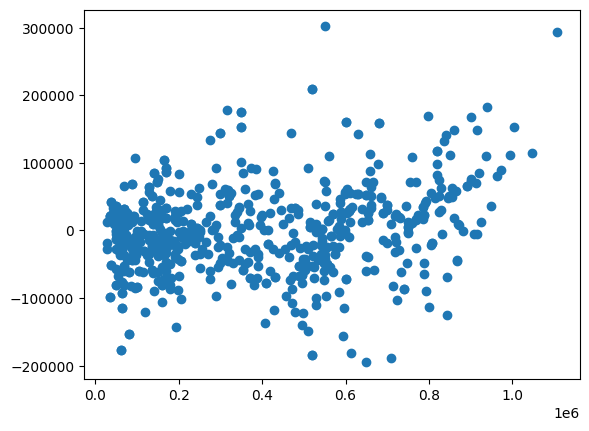

In [40]:
#график зависимости остатков от Y
plt.scatter(new_Y, result.resid)

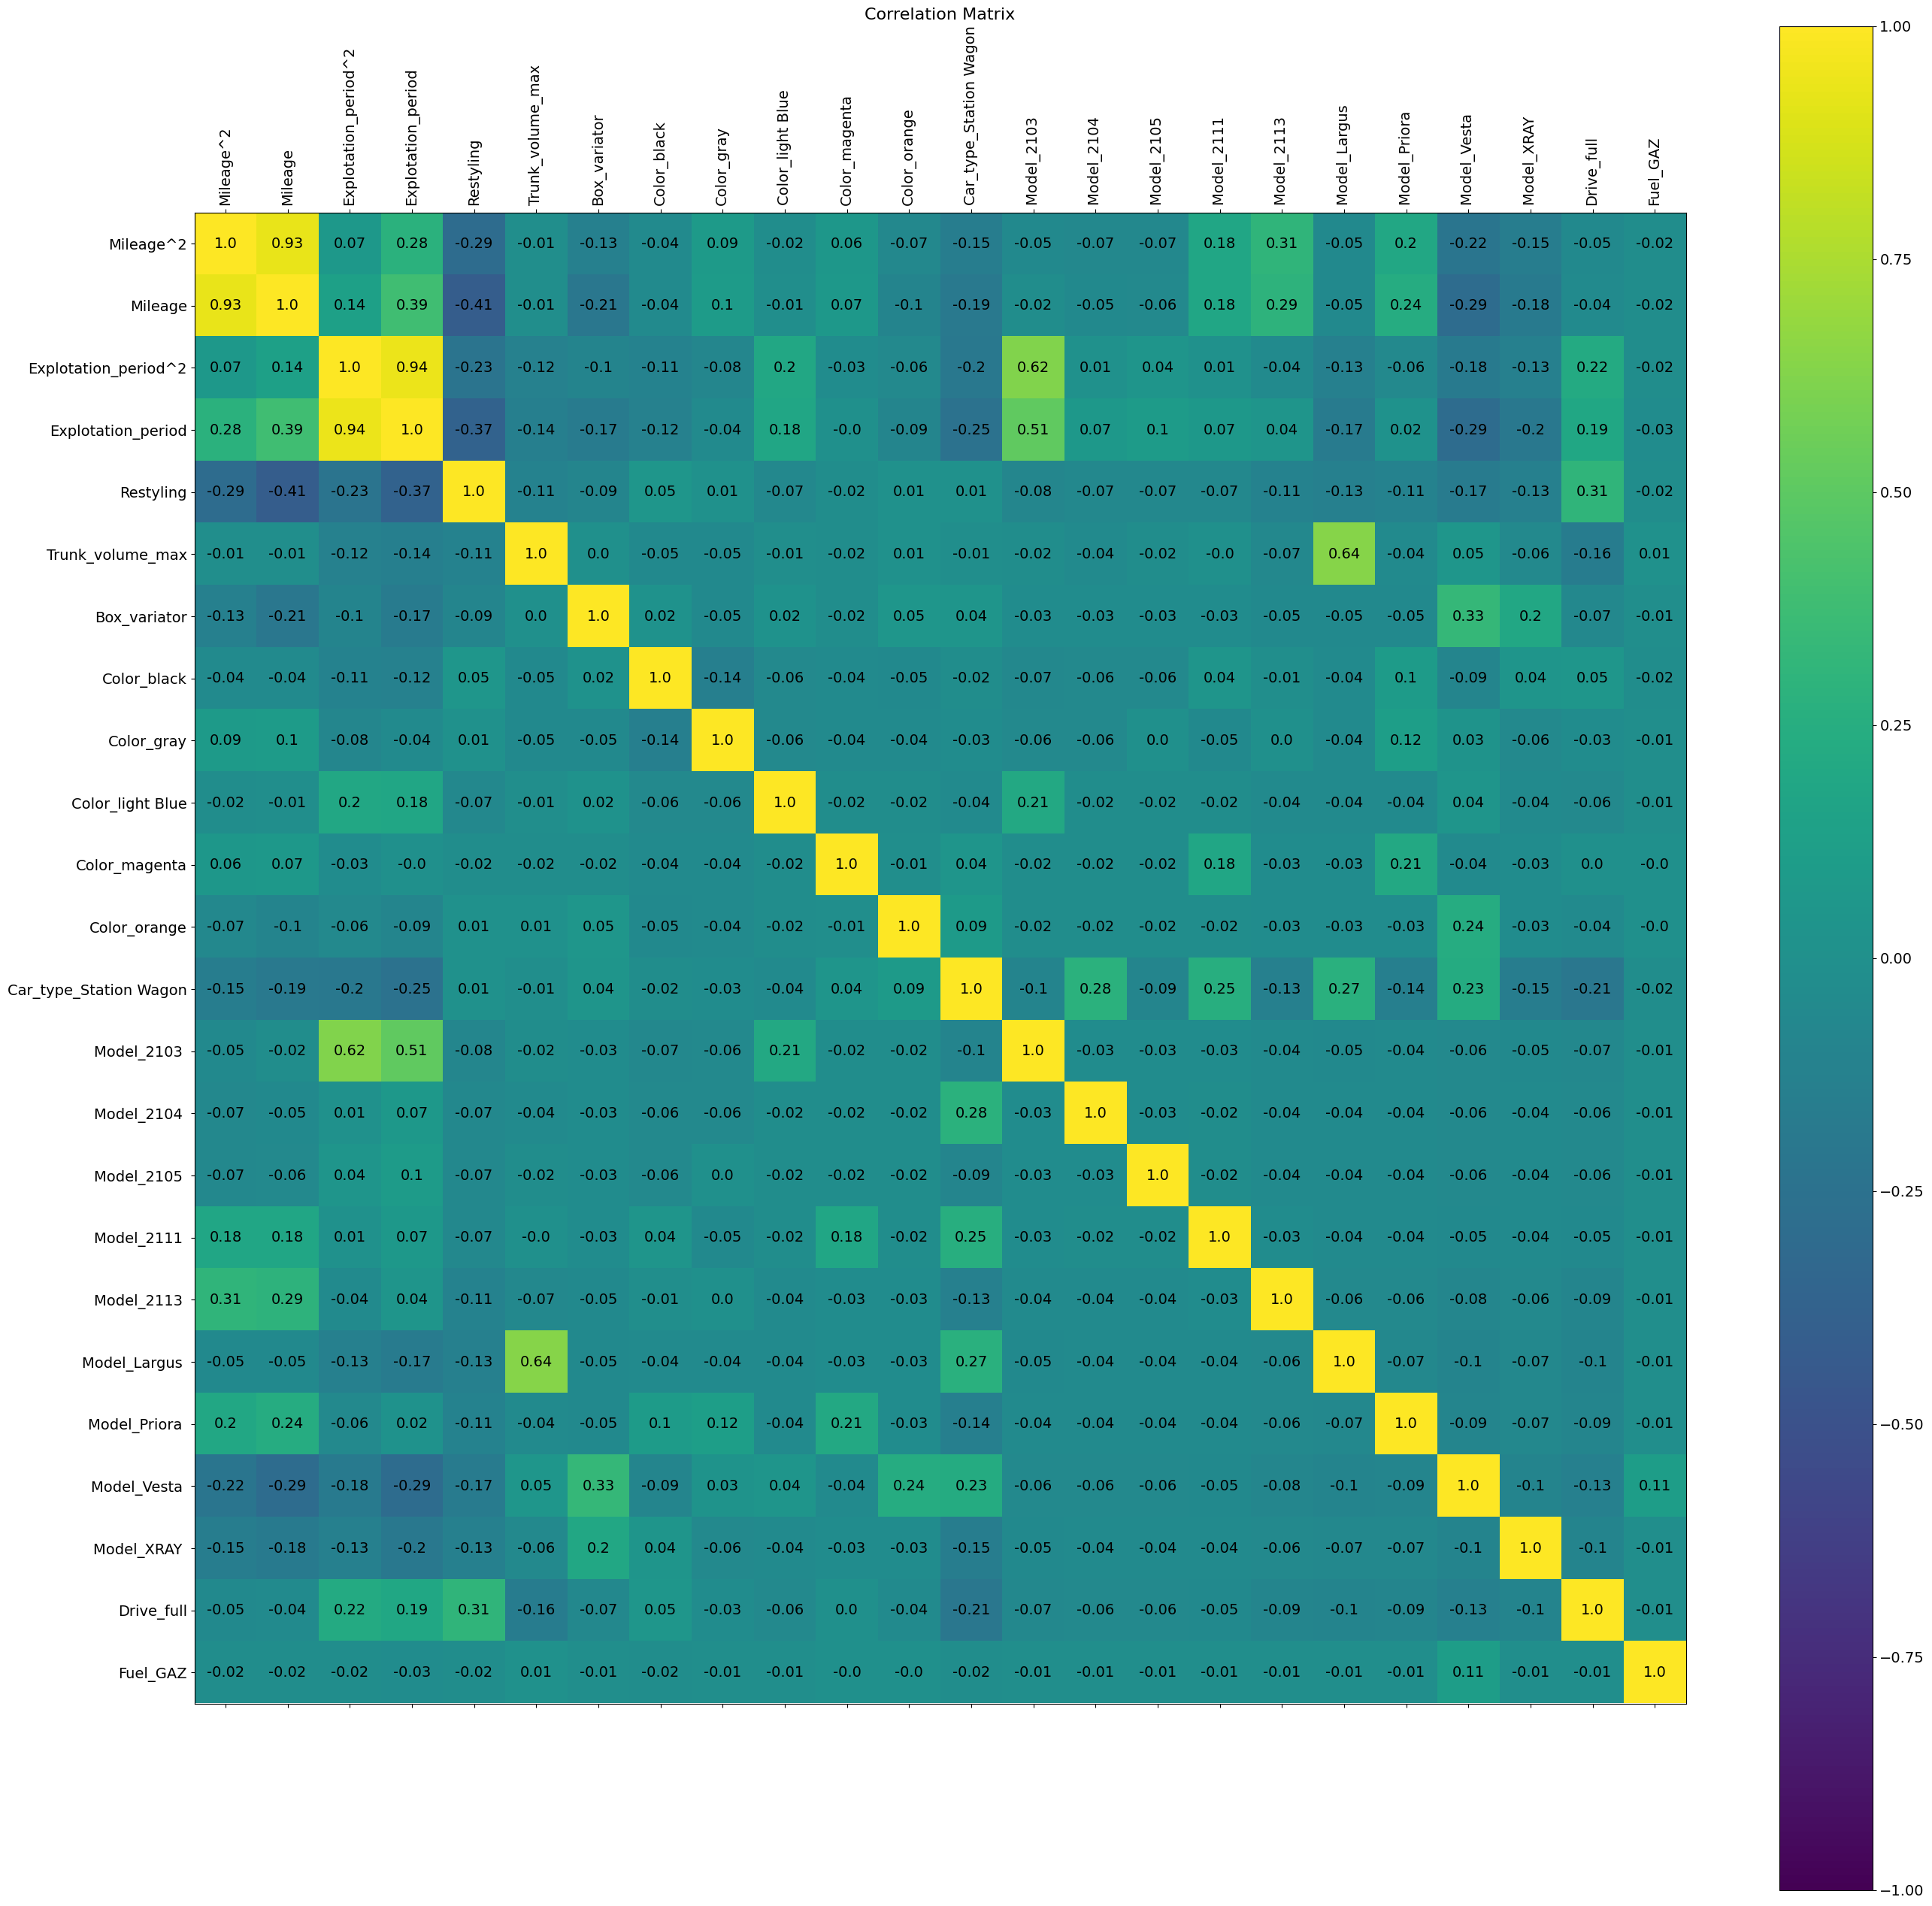

In [41]:
plot_corr(significantX)

In [42]:
A = abs(result.resid)/Y * 100

In [43]:
A.describe()

count   649.000
mean     23.399
std      34.634
min       0.000
25%       5.540
50%      12.083
75%      26.472
max     286.054
dtype: float64

In [44]:
S = (sum(result.resid**2)/624)**0.5

In [45]:
#стандартная ошибка
S

65623.53014909924

In [46]:
#стандартизированные коэффициенты регрессии
Y1 = new_Y.copy()
X1 = significantX.copy()
coefficients = sm.OLS(Y1, X1).fit().params

sd_x = X1.std()
sd_y = Y1.std()
beta_coefficients = []

for i, col in enumerate(X1.columns):
    beta = coefficients[i] * (sd_x[col] / sd_y)
    beta_coefficients.append([col, beta])

for var, beta in beta_coefficients:
    print(f' {var}: {beta}')

 Mileage^2: -0.16148934930503048
 Mileage: 0.0636739851799614
 Explotation_period^2: -0.3202090176876047
 Explotation_period: 0.38188076662016884
 Restyling: 0.6151408285303728
 Trunk_volume_max: 0.11229625400706514
 Box_variator: 0.11506544075721312
 Color_black: 0.11684515057204818
 Color_gray: 0.04811248072401532
 Color_light Blue: 0.05902181874015618
 Color_magenta: 0.0496752809573678
 Color_orange: 0.020179910208098638
 Car_type_Station Wagon: 0.22911438869131354
 Model_2103 : 0.04923082948801945
 Model_2104 : -0.07561415967079269
 Model_2105 : -0.012159254052639233
 Model_2111 : -0.08334878090597135
 Model_2113 : 0.027727041375990448
 Model_Largus : 0.3375878163813837
 Model_Priora : 0.08073931226960289
 Model_Vesta : 0.7391498459680756
 Model_XRAY : 0.5684659375410686
 Drive_full: 0.04609779329732181
 Fuel_GAZ: -0.012115145740869667


In [47]:
b = result.params
Mileage_mean = significantX["Mileage"].mean()
Explotation_period_mean = significantX["Explotation_period"].mean()
Trunk_volume_max_mean = significantX["Trunk_volume_max"].mean()
Price_mean = new_Y.mean()

elasticity_Mileage = (b[2] + 2*b[1]*Mileage_mean) * Mileage_mean / Price_mean
print(f"Средний коэффициент элластичности для пробега: {elasticity_Mileage}")

elasticity_Explotation_period = (b[4] + 2*b[3]*Explotation_period_mean) * Explotation_period_mean / Price_mean
print(f"Средний коэффициент элластичности для периода эксплуатации: {elasticity_Explotation_period}")

elasticity_Trunk_volume_max = b[6] * Trunk_volume_max_mean/Price_mean
print(f"Средний коэффициент элластичности для максимального объёма багажника: {elasticity_Trunk_volume_max}")

Средний коэффициент элластичности для пробега: -0.20208532449483366
Средний коэффициент элластичности для периода эксплуатации: -0.42126747146639715
Средний коэффициент элластичности для максимального объёма багажника: -0.05407849133390709


In [48]:
test_X = df_for_predict.loc[:, significantX.columns]
test_Y = df_for_predict["Price"]

In [49]:
th_Y = result.predict(sm.add_constant(test_X))

In [50]:
A = abs(test_Y - th_Y)/test_Y * 100

In [51]:
A.describe()

count   20.000
mean    16.087
std     18.371
min      0.368
25%      3.061
50%     10.478
75%     21.538
max     65.118
dtype: float64

In [52]:
#Фактические значения Y, теоретические значения, ошибка аппроксимации, доверительный интервал при уровне значимости 1%
pd.DataFrame({"Y":test_Y, "th_Y":th_Y, "A":A, "Left":th_Y - 1.647291391*S, "Right":th_Y + 1.647291391*S})

Y        th_Y      A        Left       Right
321  135000 156,322.212 15.794  48,221.135 264,423.288
171  660000 633,367.328  4.035 525,266.252 741,468.404
125  477500 578,602.383 21.173 470,501.307 686,703.459
167  669900 750,632.356 12.051 642,531.279 858,733.432
493  115000 111,248.401  3.262   3,147.324 219,349.477
271  399000 405,692.705  1.677 297,591.629 513,793.781
148  119000 106,836.795 10.221  -1,264.281 214,937.872
444  265000 258,483.666  2.459 150,382.590 366,584.742
628  130000 114,314.514 12.066   6,213.438 222,415.590
160   58000  95,768.719 65.118 -12,332.358 203,869.795
351  574900 529,736.710  7.856 421,635.634 637,837.787
273  300000 370,257.848 23.419 262,156.772 478,358.924
83   831900 826,095.889  0.698 717,994.813 934,196.966
424  255000 312,710.402 22.632 204,609.325 420,811.478
131  599500 597,293.135  0.368 489,192.059 705,394.212
456  315000 136,149.406 56.778  28,048.330 244,250.482
332  389000 424,135.913  9.032 316,034.836 532,236.989
374  449000 265,336.626 40.905 157,235.550 373,437.702
625  200000 202,919.728  1.460  94,818.652 311,020.805
109  569000 630,082.428 10.735 521,981.352 738,183.504